![alt text](https://d20vrrgs8k4bvw.cloudfront.net/images/courses/logos/logo-color-tensorflow.png)

In [0]:
import tensorflow as tf

# Classifying Handwritten Digits

### Hello World

Simple "Hello World" program


*   Create a constant
*   The constant is added to the graph
*   Create session
*   Run Session to get value






In [2]:
hw = tf.constant("Hello world")                       #create constant
sess = tf.Session()                                   #create session
output = sess.run(hw)                                 #run the session
print(output)                                         #print output

b'Hello world'


### Constants/Placeholders

Basic constant operaton


*   Define constant value  for 'a'
*   Define constant value for 'b'
*   Create session
*   Define addition operation
*   Run session



In [3]:
a = tf.constant(2, tf.int32)
b= tf.constant(5, tf.int32)
c = tf.add(a,b)

with tf.Session() as sess:
  result = sess.run(c)
  print(result)

7


![alt text](https://docs.google.com/uc?export=download&id=1t8xTvN31dkTBQn8uv-j6NySfSoPNQ5r-)

Basic placeholders


*   Define placeholder  'a'
*   Define placeholder 'b'
*   Create session
*   Define addition operation
*   Run session



In [5]:
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
c = tf.add(a,b)
d = tf.multiply(a,b)
e = tf.add(c,d)

with tf.Session() as sess:
  addition_result = sess.run(c, feed_dict={a:2, b:5})
  print("Addition: ", addition_result)
  multiplication_result = sess.run(d, feed_dict={a:2, b:5})
  print("Multiplication: ", multiplication_result)
  
  print("Running together: ", sess.run([c,d], feed_dict={a:2, b:5}))
  print("c+d: ", sess.run(e, feed_dict={a:2,b:5}))

Addition:  7
Multiplication:  10
Running together:  [7, 10]
c+d:  17


![alt text](https://docs.google.com/uc?export=download&id=1Vzc35K67OM-2oMduU2jR5Mj8k4HenBcA)

**Running 'c' and 'd' together: **

![alt text](https://docs.google.com/uc?export=download&id=1Ix-iXtGsfRrOKxtlup0hBPTwt4SkXoJq)

**Running 'c+d' :**

![alt text](https://docs.google.com/uc?export=download&id=1BF-XnOYXhV4Sf0yujj-NgM9eeJkKBkUe)

## Other important operations

**Argmax**

argmax: returns the index of the highest value along the given axis

In [6]:
a = tf.constant([[0.5, 1.5, 0.1, 2.3]])
b = tf.argmax(a, axis=1)

with tf.Session() as sess:
  result = sess.run(b)
  print("Result: ", result)

Result:  [3]


**Softmax**

softmax: converts scores to probabilities

The result of softmax sums to 1

In [10]:
y_hat = tf.constant([[0.5, 1.5, 0.1],[2.2, 1.3, 1.7]])
y_hat_softmax = tf.nn.softmax(y_hat)


with tf.Session() as sess:
  print("y_hat: ", sess.run(y_hat))
  print("Softmax result: ", sess.run(y_hat_softmax))

y_hat:  [[0.5 1.5 0.1]
 [2.2 1.3 1.7]]
Softmax result:  [[0.22786303 0.6193959  0.15274116]
 [0.49674627 0.20196195 0.30129185]]


In [9]:
y_true = tf.constant([[0.0, 1.0, 0.0],[0.0, 0.0, 1.0]])

with tf.Session() as sess:
  print("y_true: ", sess.run(y_true))

y_true:  [[0. 1. 0.]
 [0. 0. 1.]]


We can use cross entropy to calculate the error between y and y_hat.
We'll use 'loss_per_instance_1' to indicate error for each of the output and we'll use 'total_loss_1' to indicate cummulative error for all values 

In [12]:
loss_per_instance_1 = -tf.reduce_sum(y_true * tf.log(y_hat_softmax), reduction_indices=[1])
with tf.Session() as sess:
  print("loss_per_instance: ", sess.run(loss_per_instance_1))


loss_per_instance:  [0.4790106 1.1996759]


As you can see 'loss_per_instance_1' shows error for each corresponding pair of values separately.
The corresponding pairs are as follows:


```
y[0]: [0. 1. 0.]  
y_hat[0]: [0.5 1.5 0.1]
softmax: [0.22786303 0.6193959  0.15274116]

y[1] : [0. 0. 1.]
y_hat[1]: [2.2 1.3 1.7]
softmax: [0.49674627 0.20196195 0.30129185]
```

As you can see that for y[0] our corresponding prediction in y_hat[0] is correct (highest score on 2nd index) but for y[1] our corresponding prediction in y_hat[1] is not correct (highest score at 1st index whereas it should have been at 3rd index)

if we analyze the results for  'loss_per_instance_1':  [0.4790106 1.1996759]
We can see that the first error (between y[0] and y_hat[0] is low) and second error value(between y[1] and y_hat[1] is high)

In 'total_loss_1' we are taking mean of the errors to get a single value for error. And this is the error that we try to reduce. 


In [16]:
total_loss_1 = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(y_hat_softmax), reduction_indices=[1]))
with tf.Session() as sess:
  print("total_loss: ", sess.run(total_loss_1))


total_loss:  0.83934325


We can do both 'softmax' and 'cross entropy' in one step instead of two steps, as follows:

In [17]:
loss_per_instance_2 = tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y_true)

total_loss_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y_true))

with tf.Session() as sess:
  print("loss_per_instance: ", sess.run(loss_per_instance_1))
  print("total_loss: ", sess.run(total_loss_2))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

loss_per_instance:  [0.4790106 1.1996759]
total_loss:  0.8393433


## Logistic Regression

![alt text](https://docs.google.com/uc?export=download&id=1rVrirHRf9aHUbcNpqwL8khhHREQ0pPJv)

In [18]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [19]:
print("Number of training examples: ", mnist.train.num_examples)
print("Number of testing examples", mnist.test.num_examples)

Number of training examples:  55000
Number of testing examples 10000


<Figure size 576x396 with 0 Axes>

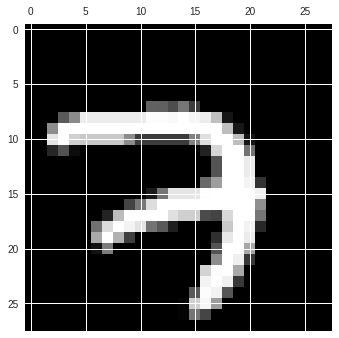

label vector:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label value:  7


In [21]:
#A way to look at data
import matplotlib.pyplot as plt
import numpy as np 

# Example of a picture - plot a sample digit picture
index = 0                                                   # Define the index
sample = mnist.train.images[index]
sample_label = mnist.train.labels[index]
plt.gray()                                                  # Initialize a gray figure
plt.matshow(sample.reshape(28,28))                          # Display a sample digit - matshow displays an array as a matrix
plt.show()                                                  # Show the plot
print ("label vector: ", sample_label)                      # display the one hot encoded corresponding label
print ("label value: ", np.argmax(sample_label, axis=0))    # display the digit(actual label of image)

<Figure size 576x396 with 0 Axes>

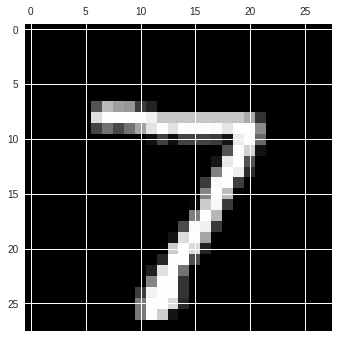

label vector:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
label value:  7


In [22]:
#Test data

# Example of a picture - plot a sample digit picture
index = 0                                                   # Define the index
sample = mnist.test.images[index]
sample_label = mnist.test.labels[index]
plt.gray()                                                  # Initialize a gray figure
plt.matshow(sample.reshape(28,28))                          # Display a sample digit - matshow displays an array as a matrix
plt.show()                                                  # Show the plot
print ("label vector: ", sample_label)                      # display the one hot encoded corresponding label
print ("label value: ", np.argmax(sample_label, axis=0))    # display the digit(actual label of image)

<Figure size 576x396 with 0 Axes>

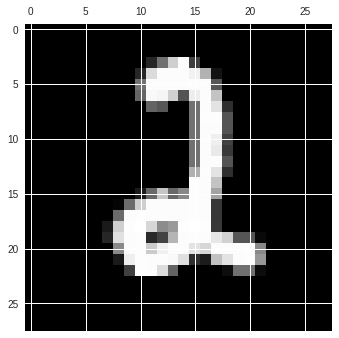

label vector:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
label value:  2


In [23]:
#Another way to look at data particularly batches 

# Example of a picture - plot a sample digit picture
sample = mnist.train.next_batch(1)
plt.gray()                                                  # Initialize a gray figure
index = 0                                                   # Define the index
plt.matshow(sample[0].reshape(28,28))                       # Display a sample digit - matshow displays an array as a matrix
plt.show()                                                  # Show the plot
print ("label vector: ", sample[1])                         # display the one hot encoded corresponding label
print ("label value: ", np.argmax(sample[1][0], axis=0))    # display the digit(actual label of image)

![alt text](https://docs.google.com/uc?export=download&id=1kS7uwLI96gynOkJpdItCqL1iIIptgdUF)

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [0]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

In [26]:
# Set model weights
W = tf.Variable(tf.random_normal((784, 10)), name="W")
b = tf.Variable(tf.zeros([10]), name="b")

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#logits
logits = tf.matmul(x, W) + b

In [0]:
# Softmax
pred = tf.nn.softmax(logits)

In [0]:
# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

In [34]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [38]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    single_pred = tf.argmax(pred, 1)
    print("Prediction:", single_pred.eval({x: [mnist.test.images[0]] , y: [mnist.test.labels[0]]}))

Epoch: 0001 cost= 9.544629245
Epoch: 0002 cost= 4.728093558
Epoch: 0003 cost= 3.188260416
Epoch: 0004 cost= 2.506484444
Epoch: 0005 cost= 2.126873945
Epoch: 0006 cost= 1.883280209
Epoch: 0007 cost= 1.710171776
Epoch: 0008 cost= 1.580547175
Epoch: 0009 cost= 1.478591946
Epoch: 0010 cost= 1.395627772
Epoch: 0011 cost= 1.326506106
Epoch: 0012 cost= 1.267898576
Epoch: 0013 cost= 1.217294704
Epoch: 0014 cost= 1.173307299
Epoch: 0015 cost= 1.134132472
Epoch: 0016 cost= 1.099345019
Epoch: 0017 cost= 1.068228604
Epoch: 0018 cost= 1.039894777
Epoch: 0019 cost= 1.014383006
Epoch: 0020 cost= 0.991024606
Epoch: 0021 cost= 0.969511730
Epoch: 0022 cost= 0.949460702
Epoch: 0023 cost= 0.931298790
Epoch: 0024 cost= 0.913876286
Epoch: 0025 cost= 0.898077025
Optimization Finished!
Accuracy: 0.8255
Prediction: [7]


## Neural Network


![alt text](https://docs.google.com/uc?export=download&id=1NA2PL2rMPlLXkGS650O-C5TZDajn1pX-)

In [40]:
tf.reset_default_graph()

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
# W = tf.Variable(tf.zeros([784, 10]))
W1 = tf.Variable(tf.random_normal((784, 128)), name="W1")
b1= tf.Variable(tf.zeros([128]), name="b1")
z1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))

W2 = tf.Variable(tf.random_normal((128, 10)), name="W2")
b2= tf.Variable(tf.zeros([10]), name="b2")
z2 = tf.add(tf.matmul(z1, W2), b2)

#you can add another layer by uncommenting the following lines (remember to relace z2 with z3 for pred etc too then):
# W2 = tf.Variable(tf.random_normal((128, 32)), name="W2")
# b2= tf.Variable(tf.zeros([32]), name="b2")
# z2 = tf.nn.relu(tf.add(tf.matmul(z1, W2), b2))

# W3 = tf.Variable(tf.random_normal((32, 10)), name="W3")
# b3= tf.Variable(tf.zeros([10]), name="b3")
# z3 = tf.add(tf.matmul(z2, W3), b3)


#------Construct model--------

#calculate softmax and cross entropy
pred = tf.nn.softmax_cross_entropy_with_logits(logits=z2, labels=y)

# Define cost as mean error for the predicted values
cost = tf.reduce_mean(pred)

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(z2, axis=-1), tf.argmax(y, axis=-1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images , y: mnist.test.labels}))
    
    single_pred = tf.argmax(z2,axis=-1)
    print("Prediction:", single_pred.eval({x: mnist.test.images[0:1] , y: mnist.test.labels[0:1]}))
  

Epoch: 0001 cost= 15.689580512
Epoch: 0002 cost= 5.439291325
Epoch: 0003 cost= 3.990620464
Epoch: 0004 cost= 3.244490582
Epoch: 0005 cost= 2.765024950
Epoch: 0006 cost= 2.423242274
Epoch: 0007 cost= 2.156936498
Epoch: 0008 cost= 1.947304224
Epoch: 0009 cost= 1.773296115
Epoch: 0010 cost= 1.629427760
Epoch: 0011 cost= 1.507307056
Epoch: 0012 cost= 1.402755908
Epoch: 0013 cost= 1.313982177
Epoch: 0014 cost= 1.235004933
Epoch: 0015 cost= 1.166432914
Epoch: 0016 cost= 1.103037721
Epoch: 0017 cost= 1.046538710
Epoch: 0018 cost= 0.996338238
Epoch: 0019 cost= 0.950695224
Epoch: 0020 cost= 0.907344221
Epoch: 0021 cost= 0.869180716
Epoch: 0022 cost= 0.835512749
Epoch: 0023 cost= 0.801114108
Epoch: 0024 cost= 0.770675371
Epoch: 0025 cost= 0.743164948
Optimization Finished!
Accuracy: 0.894
Prediction: [7]
